# Análisis del uso de la plataforma por parte de los usuarios

In [1]:
#importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')

sns.set(style="whitegrid")

In [2]:
#cargo csv
events = pd.read_csv('./data/events.csv', low_memory=False)
pd.set_option('display.max_columns', 51)

In [3]:
#veo como esta formado
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Por el momento solo quiero analizar como se comportaron las personas sobre la plataforma
### Me quedo con las columnas mas importantes para el analisis

In [4]:
#me quedo con las columnas que me importan
events_short = events.filter(items=['timestamp','event','person','campaign_source','channel','new_vs_returning', 'search_engine', 'search_term'])

In [5]:
#veo como esta formado
events_short.head()

,timestamp,event,person,campaign_source,channel,new_vs_returning,search_engine,search_term
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,criteo,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,Paid,New,NaN,NaN
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,NaN,NaN,NaN,NaN


In [6]:
#cambio timestamp a datetime
#agrego la columna de mes
events_short['timestamp'] = pd.to_datetime(events_short['timestamp'])
events_short['month'] = events_short['timestamp'].dt.month

In [7]:
#events_short['month'] = events_short['timestamp'].dt.month
#events_short['day'] = events_short['timestamp'].dt.day
#events_short.sort_values(by=['person', 'timestamp'], ascending=True)

### De todos los usuarios que generaron eventos en la plataforma, veamos cuantos son nuevos y cuales ya estuvieron anteriormente en la misma

Text(0.5,1,'Cantidad de usuarios nuevos contra viejos')

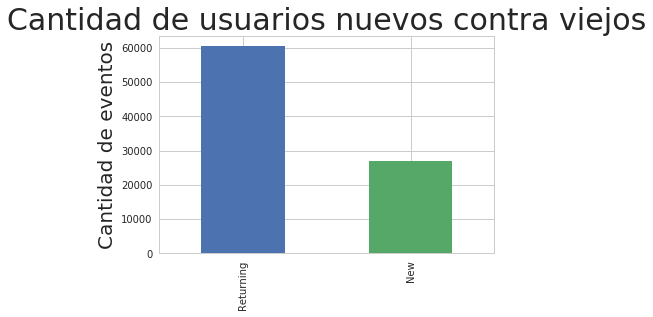

In [8]:
p = events_short['new_vs_returning'].value_counts().plot.bar()
p.set_ylabel('Cantidad de eventos', fontsize= 20)
p.set_title('Cantidad de usuarios nuevos contra viejos', fontsize=30)

Como se puede observar la mayoria de los usuarios que usaron la plataforma en los primeros 6 meses del 2018, son usuarios viejos.

## ¿De que manera llegaron a la plataforma los usuarios nuevos contra los viejos?

Elimino del dataframe todos los usuarios de los cuales no se tenga informacion si son nuevos o viejos.

In [9]:
#quiero analizar usuarios nuevos de los viejos
#elimino todos las filas en las q not enga esa informacion
new_vs_returning = events_short.dropna(subset=['new_vs_returning'])

In [10]:
#veo como esta formada
new_vs_returning.head()

,timestamp,event,person,campaign_source,channel,new_vs_returning,search_engine,search_term,month
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,Paid,New,NaN,NaN,5
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,Paid,New,NaN,NaN,5
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,Paid,New,NaN,NaN,4
16,2018-05-24 11:21:07,visited site,000a54b2,NaN,Paid,Returning,NaN,NaN,5
45,2018-04-06 05:12:05,visited site,00184bf9,NaN,Organic,New,NaN,NaN,4


In [11]:
new_vs_returning['new_vs_returning'].value_counts()

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

In [12]:
new_vs_returning['channel'].value_counts()

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Unknown         9
Name: channel, dtype: int64

## Creo dos dataframes distintos, uno que contenga las visitas de los usuarios nuevos y otro para los viejos

In [13]:
#creo dos dataframes nuevos uno con todos los usuarios returning y otro con la data de 
#todos los usuarios nuevos
#g = new_vs_returning.groupby(['month', 'channel']).agg({'new_vs_returning' : 'count'})
new = new_vs_returning.loc[new_vs_returning['new_vs_returning'] == 'New']
returning = new_vs_returning.loc[new_vs_returning['new_vs_returning'] == 'Returning']

In [14]:
#agrupo ambos dataframes por mes y canal
new = new.groupby(['month', 'channel']).agg({'new_vs_returning' : 'count'})
returning = returning.groupby(['month' , 'channel']).agg({'new_vs_returning' : 'count'})

In [15]:
#transformo los canales en columnas
new.unstack()

new_vs_returning                                              
channel           Direct Email Organic    Paid Referral Social Unknown
month                                                                 
1                   51.0   NaN   154.0   287.0     12.0   13.0     NaN
2                   55.0   NaN   109.0   317.0     11.0    7.0     NaN
3                  116.0   1.0   270.0   670.0     26.0   42.0     NaN
4                  172.0   NaN   440.0   952.0     44.0   19.0     NaN
5                 1027.0   7.0  2581.0  8459.0    341.0  188.0     1.0
6                  786.0   2.0  2155.0  7124.0    250.0  209.0     NaN

In [16]:
returning.unstack()

new_vs_returning                                               
channel           Direct Email Organic     Paid Referral Social Unknown
month                                                                  
1                  567.0   1.0   198.0    424.0    390.0   38.0     NaN
2                  764.0   3.0   201.0    879.0    413.0   31.0     NaN
3                 1745.0  16.0   526.0   2684.0   1069.0   82.0     NaN
4                 3376.0  12.0  1064.0   4654.0   1896.0   20.0     1.0
5                 7187.0  28.0  3189.0  12173.0   4870.0   79.0     7.0
6                 2676.0   6.0  1461.0   5570.0   2062.0  118.0     NaN

In [17]:
#hago un pivot de table, transofmrando mes en indice, chanel en columnas y new_vs_returning como valores de ambos indices
new = new.pivot_table(index='month', columns='channel', values='new_vs_returning')
returning = returning.pivot_table(index='month', columns='channel', values='new_vs_returning')

In [18]:
new = new.drop('Unknown', 1)
returning = returning.drop('Unknown', 1)

### Como se puede observar en el siguiente grafico, la mayoria de los usuarios nuevos ingresan al sitio web por canales pagos

Text(0.5,1,'Cantidad de visitas de usuarios nuevos por canal y mes')

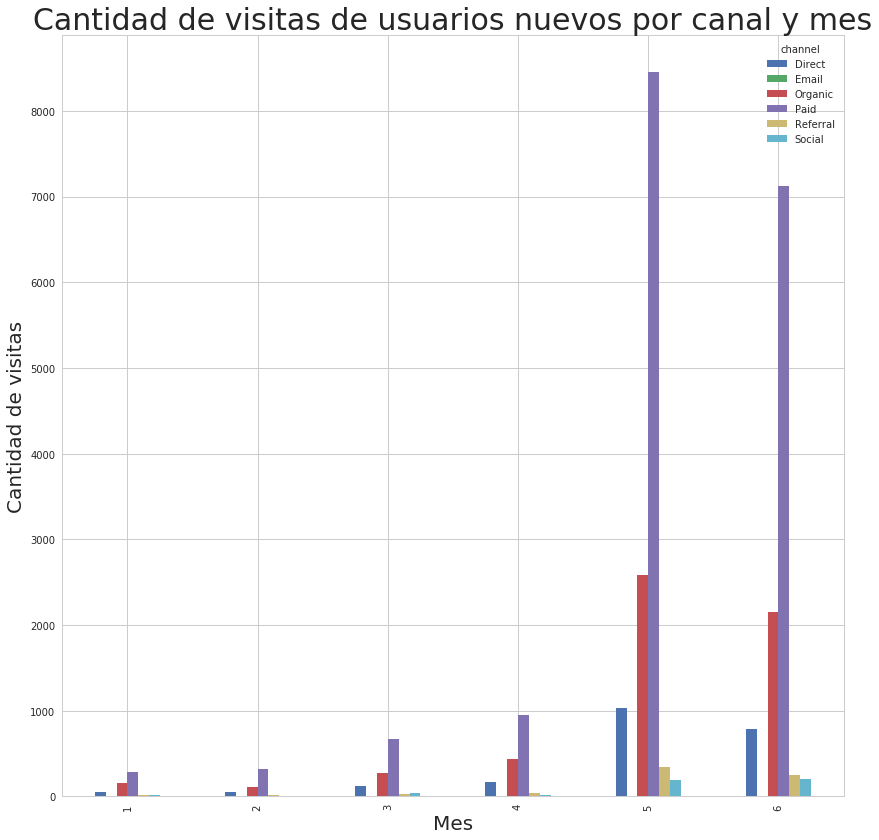

In [19]:
p = new.plot.bar(figsize=(14,14))

p.set_ylabel('Cantidad de visitas', fontsize=20)
p.set_xlabel('Mes', fontsize=20)
p.set_title('Cantidad de visitas de usuarios nuevos por canal y mes', fontsize=30)

## Veamos que pasa con los usuarios que vuelven a la plataforma
### En el siguiente grafico se observa que el canal pago sigue predominando, pero a diferencia de los usuarios viejos se puede observar que muchos ingresan de forma directa al sitio web, por ende  la primera impresion que hayan tenido sobre el sitio web fue buena e interesante, ya que muchos decidieon volver de forma directa

Text(0.5,1,'Cantidad de visitas de usuarios viejos por canal y mes')

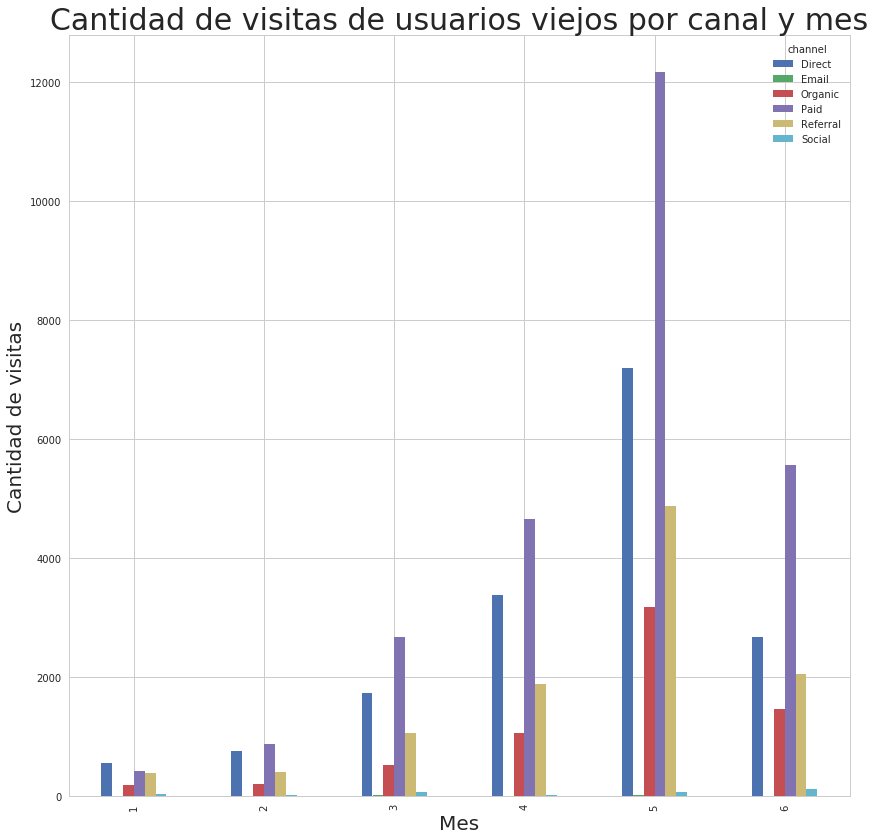

In [20]:
p = returning.plot.bar(figsize=(14,14))
p.set_ylabel('Cantidad de visitas', fontsize=20)
p.set_xlabel('Mes', fontsize=20)
p.set_title('Cantidad de visitas de usuarios viejos por canal y mes', fontsize=30)

### Analicemos la cantidad de conversiones de los usuarios

In [21]:
#me quedo con los eventos de conversiones y checkout
check_conv = events_short.loc[(events_short['event'] == 'conversion') | (events_short['event'] == 'checkout')]

In [22]:
check_conv

,timestamp,event,person,campaign_source,channel,new_vs_returning,search_engine,search_term,month
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,NaN,NaN,NaN,NaN,5
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,NaN,NaN,NaN,NaN,5
44,2018-05-24 11:34:32,checkout,000a54b2,NaN,NaN,NaN,NaN,NaN,5
85,2018-04-06 05:14:58,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,4
86,2018-04-06 05:18:15,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,4
94,2018-05-04 18:50:21,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,5
95,2018-05-17 04:45:15,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,5
103,2018-05-17 00:11:26,checkout,0019c395,NaN,NaN,NaN,NaN,NaN,5
110,2018-06-08 12:19:50,checkout,001bb7eb,NaN,NaN,NaN,NaN,NaN,6
114,2018-05-29 12:56:27,checkout,001f1653,NaN,NaN,NaN,NaN,NaN,5


In [23]:
check_conv = check_conv.groupby(['month', 'event']).agg({'person' : 'count'})

In [24]:
check_conv

person
month event             
1     checkout       331
      conversion      63
2     checkout       441
      conversion      74
3     checkout      1386
      conversion     265
4     checkout      1965
      conversion     316
5     checkout     15645
      conversion     351
6     checkout     13967
      conversion     103

In [25]:
check_conv = check_conv.pivot_table(index='month', columns='event', values='person')

In [26]:
check_conv

event,checkout,conversion
month,,
1,331,63
2,441,74
3,1386,265
4,1965,316
5,15645,351
6,13967,103


### Como se puede observar en el siguiente grafico, la cantidad de checkouts supera ampliamente la cantidad de conversiones por mes.

## Tambien se puede ver como en el quinto mes, la cantidad de checkouts se multiplico por ocho sin embargo la cantidad de conversiones no aumentaron proporcionalmente junto con la cantidad de checkouts

## ¿Por que podria ser esto? ¿Por que aumentaron tanto los checkouts estos dos ultimos meses?

Text(0,0.5,'Cantidad')

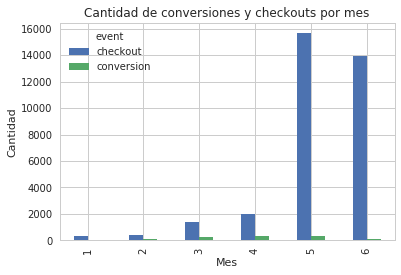

In [27]:
p = check_conv.plot.bar()
p.set_title('Cantidad de conversiones y checkouts por mes')
p.set_xlabel('Mes')
p.set_ylabel('Cantidad')

In [28]:
events_short.head()

,timestamp,event,person,campaign_source,channel,new_vs_returning,search_engine,search_term,month
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,criteo,NaN,NaN,NaN,NaN,5
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,Paid,New,NaN,NaN,5
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,NaN,NaN,NaN,NaN,5
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,NaN,NaN,NaN,NaN,5
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,NaN,NaN,NaN,NaN,5


### Analizaremos los meses de abril y mayo en el cual se ve este aumento desproporcionado de la cantidad de checkouts

In [29]:
events_may_april = events_short.loc[(events_short['month'] == 5) | (events_short['month'] == 4)]

In [30]:
events_may_april

,timestamp,event,person,campaign_source,channel,new_vs_returning,search_engine,search_term,month
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,criteo,NaN,NaN,NaN,NaN,5
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,Paid,New,NaN,NaN,5
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,NaN,NaN,NaN,NaN,5
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,NaN,NaN,NaN,NaN,5
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,NaN,NaN,NaN,NaN,5
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,Paid,New,NaN,NaN,5
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,criteo,NaN,NaN,NaN,NaN,5
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,NaN,NaN,NaN,NaN,5
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,4
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,Paid,New,NaN,NaN,4


In [31]:
grouped = events_may_april.groupby(['month', 'channel']).agg({'event' : 'count'})

In [32]:
grouped = grouped.unstack()
grouped
#grouped = grouped.pivot_table(index='month', columns='channel', values='event')

event                                             
channel Direct Email Organic   Paid Referral Social Unknown
month                                                      
4         3548    12    1504   5606     1940     39       1
5         8214    35    5770  20632     5211    267       8

In [33]:
grouped = grouped.pivot_table(index='month', columns='channel', values='event')

### No se por que en vez de 4 y 5, me pone channel y month

#### Pero se puede ver como aumentaron por 4 la cantidad de usuarios pagos, se podria llegar a la conclusion de que los usuarios a pesar de obetenr mayor cantidad de visitas por usuarios pagos, estos raramente haran una conversion

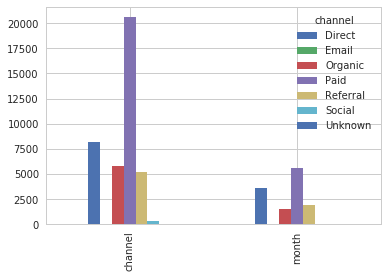

In [34]:
grouped.plot.bar()

### Intentemos categorizar a todos los usuarios, si son pagos o no pagos y luego de eso veremos cuales realizaorn conversiones y cuales no